In [1]:
from unidecode import unidecode
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np

# Importação dos dados

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,NivelRiodoSul,NívelItuporanga,ChuvaItuporanaga,NívelTaió,ChuvaTaió
0,"170,0","30,0","3,0","98,0","0,0"
1,"170,0","39,0","12,0","98,0","0,0"
2,"169,0","59,0","19,0","98,0","0,0"
3,"169,0","82,0","5,0","98,0","0,0"
4,"169,0","27,0","1,0","97,0","0,0"


# Limpeza dos dados

In [3]:
dataset.columns = [unidecode(col) for col in dataset.columns]
dataset = dataset.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
dataset = dataset.apply(pd.to_numeric, errors='coerce')

In [4]:
dataset.head()

,NivelRiodoSul,NivelItuporanga,ChuvaItuporanaga,NivelTaio,ChuvaTaio
0,170.0,30.0,3.0,98.0,0.0
1,170.0,39.0,12.0,98.0,0.0
2,169.0,59.0,19.0,98.0,0.0
3,169.0,82.0,5.0,98.0,0.0
4,169.0,27.0,1.0,97.0,0.0


In [39]:
dataset = dataset.dropna()

In [42]:
dataset = dataset.drop_duplicates()

# Análise exploratória

In [45]:
dataset.describe()

,NivelRiodoSul,NivelItuporanga,ChuvaItuporanaga,NivelTaio,ChuvaTaio
count,40277.000000,40277.000000,40277.000000,40277.000000,40277.000000
mean,244.644239,71.920178,0.084480,223.151997,0.066584
std,141.962868,45.838199,0.960258,169.704250,0.592250
min,90.000000,8.000000,0.000000,46.000000,0.000000
25%,146.000000,43.000000,0.000000,100.000000,0.000000
50%,199.000000,57.000000,0.000000,160.000000,0.000000
75%,297.000000,84.000000,0.000000,282.000000,0.000000
max,1240.000000,512.000000,140.600000,975.000000,48.000000


array([[<AxesSubplot:title={'center':'NivelRiodoSul'}>,
        <AxesSubplot:title={'center':'NivelItuporanga'}>],
       [<AxesSubplot:title={'center':'ChuvaItuporanaga'}>,
        <AxesSubplot:title={'center':'NivelTaio'}>],
       [<AxesSubplot:title={'center':'ChuvaTaio'}>, <AxesSubplot:>]],
      dtype=object)

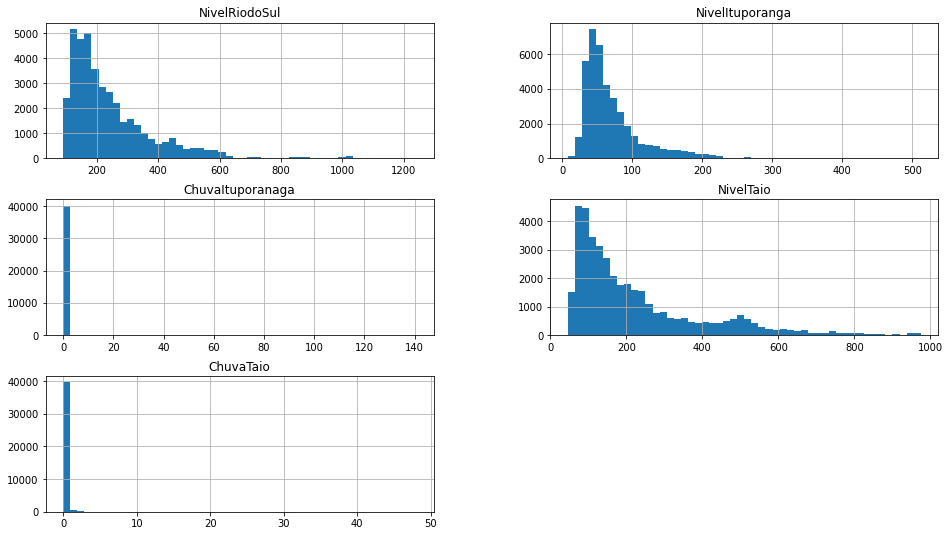

In [46]:
dataset[['NivelRiodoSul', 'NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']].hist(bins=50, figsize=(16, 9))

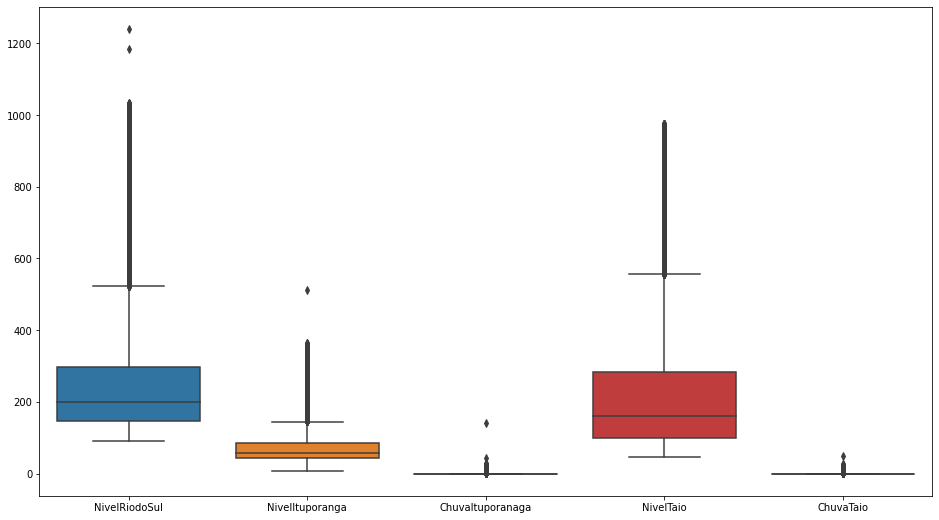

In [47]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=dataset[['NivelRiodoSul', 'NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']])
plt.show()

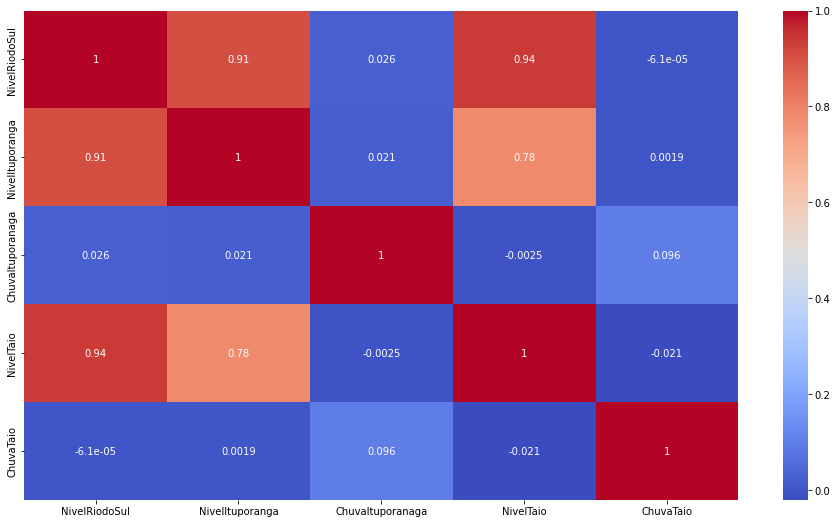

In [48]:
plt.figure(figsize=(16, 9))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

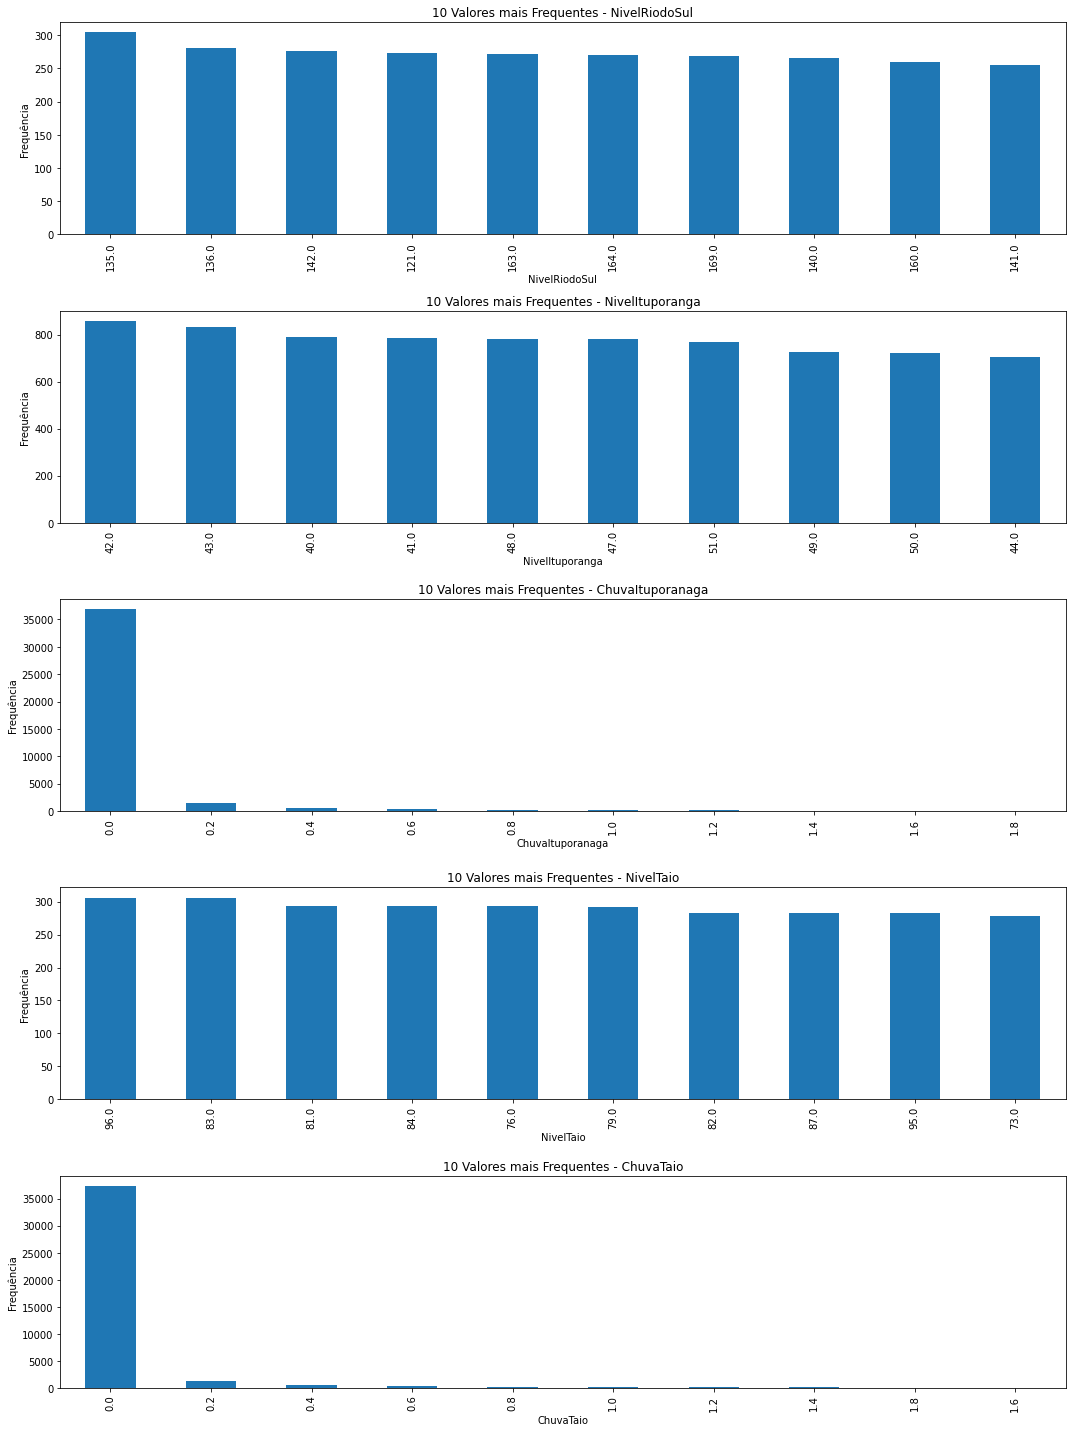

In [49]:
colunas = ['NivelRiodoSul', 'NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']

plt.figure(figsize=(15, 20))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)
    dataset[coluna].value_counts().head(10).plot(kind='bar')
    plt.title(f'10 Valores mais Frequentes - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Treinamento

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Subset 1

In [12]:
x = dataset[['NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [13]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)

LinearRegression()

In [14]:
previsao = regressao.predict(x_test)

### Avaliação do modelo

In [15]:
r2_score(y_test, previsao)

0.962452746885696

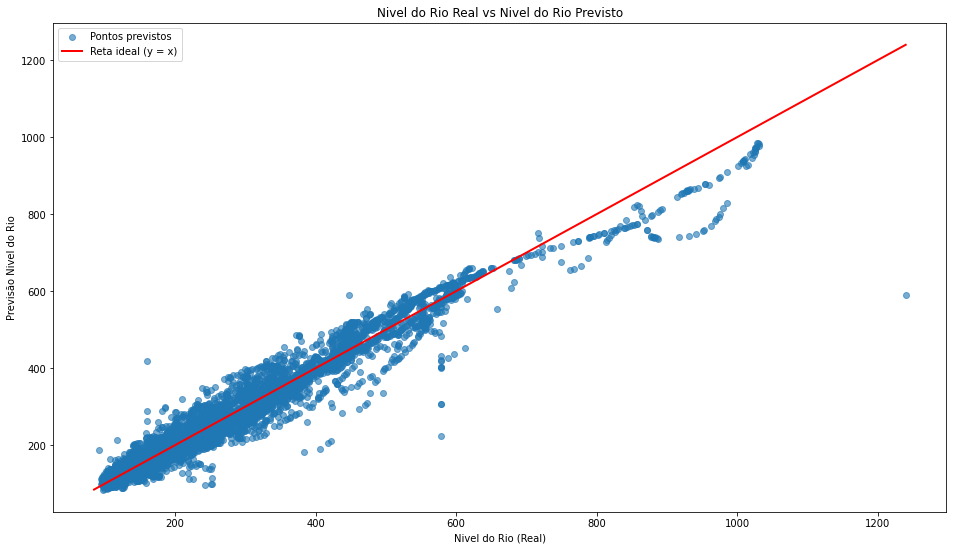

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 2

In [17]:
x = dataset[['NivelItuporanga', 'NivelTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [18]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)

LinearRegression()

In [20]:
previsao = regressao.predict(x_test)

### Avaliação do modelo

In [21]:
r2_score(y_test, previsao)

0.9619662648207621

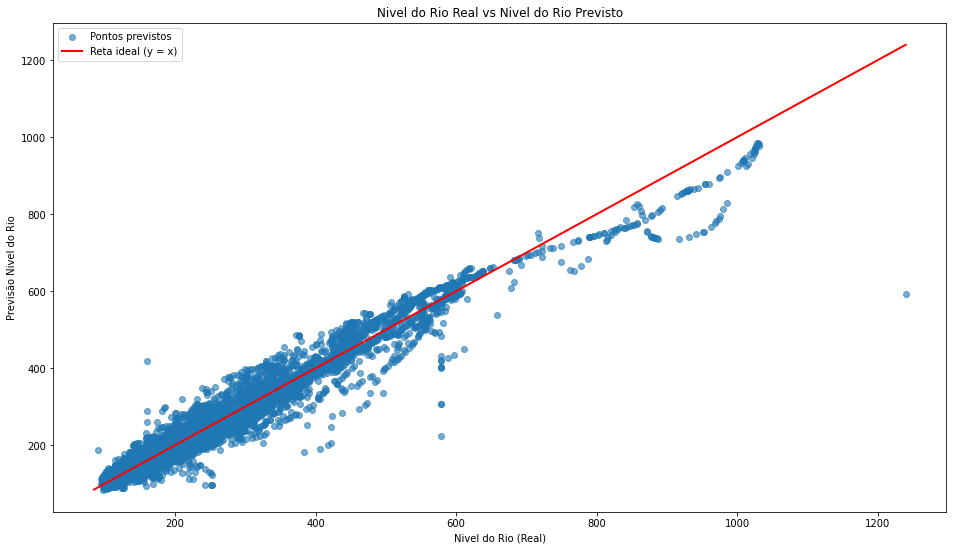

In [22]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 3

In [23]:
x = dataset[['ChuvaItuporanaga', 'ChuvaTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [24]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)

LinearRegression()

In [26]:
previsao = regressao.predict(x_test)

### Avaliação do modelo

In [27]:
r2_score(y_test, previsao)

0.0030407539136513284

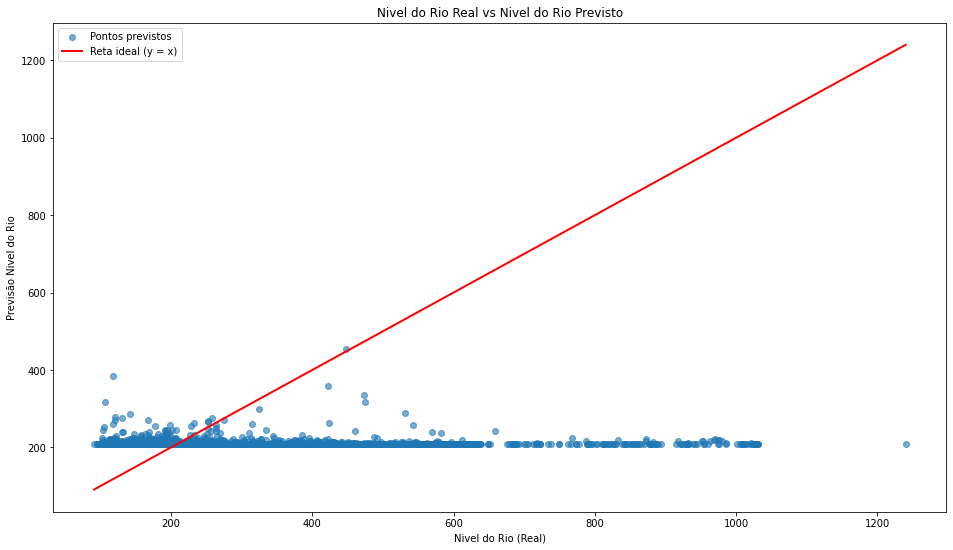

In [28]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 4

In [29]:
x = dataset[['NivelTaio', 'ChuvaTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [30]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)

LinearRegression()

In [31]:
previsao = regressao.predict(x_test)

### Avaliação do modelo

In [32]:
r2_score(y_test, previsao)

0.895898655288241

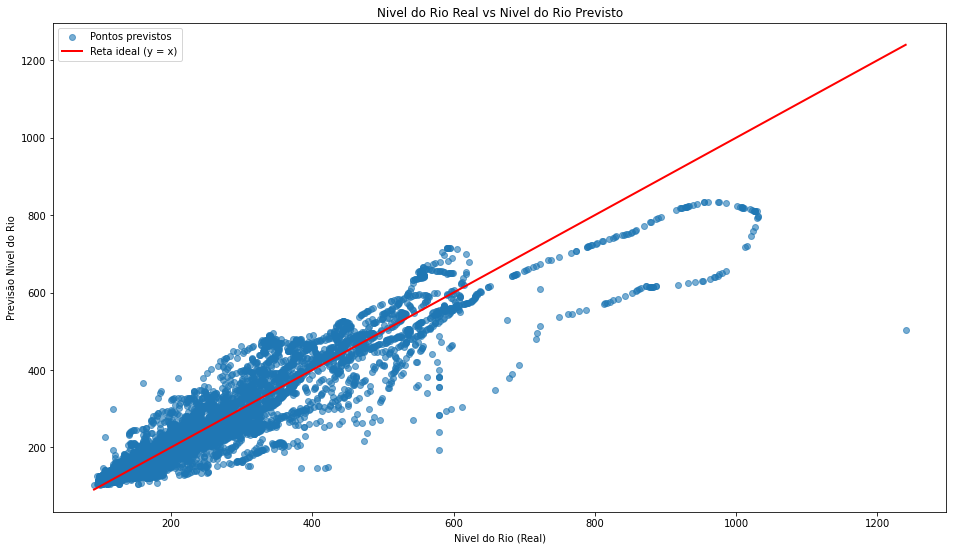

In [33]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 5

In [34]:
x = dataset[['NivelItuporanga', 'ChuvaItuporanaga']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [35]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)

LinearRegression()

In [36]:
previsao = regressao.predict(x_test)

### Avaliação do modelo

In [37]:
r2_score(y_test, previsao)

0.8392621680655551

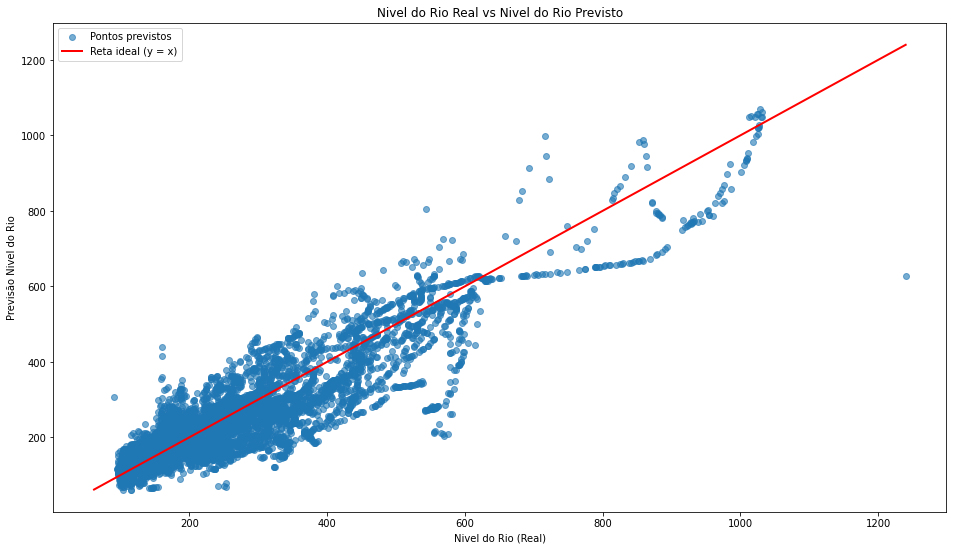

In [38]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

In [ ]:
adicionar coeficientes
outros métodos de avaliação
exportr o modelo 
aplicação